# How can machine learning be applied to predict site to classify site stability of carbon storage basins?

In my second subquestion, I use a dataset from Miocic et al. (2016) of global CGS basins. 

# Import Necessary Packages

In [24]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Read in Data from Miocic et al. (2016)
I read in the dataframe that I previously created using Miocic et al. (2016).

In [6]:
miocic = pd.read_csv('miocic_df.csv').set_index('Name')
miocic 

,Densities,Leakage,Reservoir thickness (Gross),Seal thickness,Depth,Temperature,Pressure,Trapmech_structural,Trapmech_stratigraphic,Structural_fault,...,Res_sandstone,Res_carbonates,Res_other,Carbonate_limestone,Carbonate_dolomite,Seal_shale,Seal_evaporite,Seal_other,Stacked_yes,Stacked_nan
Name,,,,,,,,,,,,,,,,,,,,,
Jackson Dome,654.6,0.0,214.4,900.0,4660.00,150.000000,491.6,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
El Trapial Field,141.0,0.0,163.4,210.0,1234.00,56.000000,64.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.8,0.2,0.4,0.0,1.0
Messokampos,0.9,1.0,260.0,10.0,500.00,25.000000,0.5,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
Budafa Field,451.6,0.0,100.0,420.0,3300.00,164.000000,295.0,1.0,0.2,0.4,...,1.0,0.0,0.0,0.0,0.0,1.0,0.2,0.2,1.0,0.0
DF1-1 Field,378.3,0.0,190.4,210.0,1365.00,70.000000,129.2,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Turaco, Albertine Graben",769.4,0.0,166.0,266.0,2500.00,87.667043,288.8,0.8,0.2,0.4,...,1.0,0.0,0.0,0.0,0.0,0.8,0.2,0.0,1.0,0.0
DF29-1,465.2,0.0,80.0,300.0,1837.00,92.000000,186.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
L22-1,423.8,0.0,121.7,300.0,1498.00,78.000000,138.8,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


# Principal Component Analysis

Principal Component Analysis (PCA) is a method of unsupervised machine learning which maximizes variance and important information from a table by creating principal components of a linear combination of features. This is typically performed on inter-correlated data with linearly dependent features.

I perform PCA using the data’s features and withhold data labels (leakage presence/absence). This enables the model to reveal inherent structures within the data to potentially partition the sites based on certain characteristics without explicit training.

In order to perform PCA, I need to reorient the data to be a 61 x 22 numpy array. I also only want to include the data, not the Leakage information. I create miocic_pca_arr which is a numpy array of the miocic dataframe only containing feature information, not leakage/stability.

In [13]:
miocic_pca = miocic.drop(columns= 'Leakage')
miocic_pca_arr = miocic_pca.to_numpy()
miocic_pca_arr.shape

(61, 22)

Next, I calculate the mean and standard deviation across each column/feature in order to center and standardize the numpy array. This is essential in PCA because it prevents percieved feature importance due to size of numbers alone. This way, features are standardized across different scales, allowing PCA to identify key features not considering conflated number values.

In [16]:
miocic_mean = np.mean(miocic_pca_arr, axis=0)
miocic_std = np.std(miocic_pca_arr, axis=0)
miocic_standardized = (miocic_pca_arr - miocic_mean) / miocic_std

In [18]:
pca = PCA()
pca.fit(miocic_standardized)
miocic_2d= pca.transform(miocic_standardized)[:, :2]

## Visualize Principal Components
In order to visualize the PCA, I plot the transformed data using the first two principal components as the x and y axis. I color the data based on the Leakage target variable.

In [57]:
hue = miocic['Leakage'].map({0: 'No Leakage (Stable)',
                            1: 'Leakage Detected (Insecure)',
                            2: 'Ambiguous'})
palette = {'No Leakage (Stable)': '#1f77b4', # '#4C72B0', # '#1f77b4'
           'Leakage Detected (Insecure)': 'red',
           'Ambiguous': '#4D4D4D'}

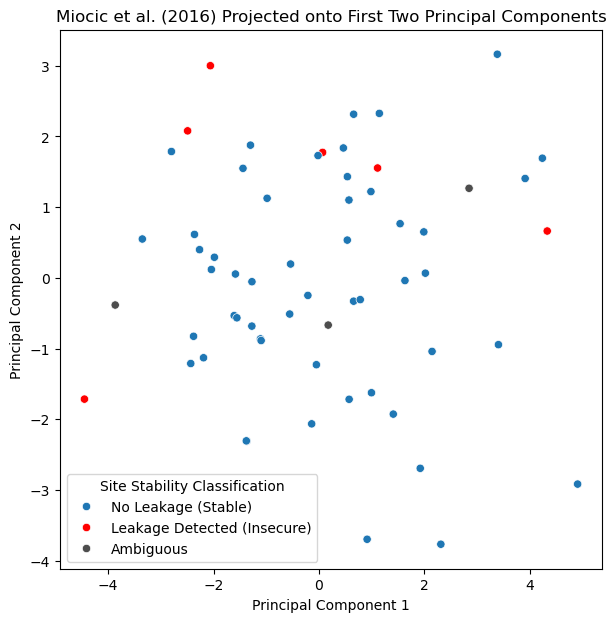

In [58]:
plt.figure(figsize = (7, 7))
plt.title("Miocic et al. (2016) Projected onto First Two Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
ax = sns.scatterplot(x = miocic_2d[:, 0], y = miocic_2d[:, 1], hue = hue, palette = palette)
ax.legend(title='Site Stability Classification');

## PCA Analysis
To further determine the success of the PCA, I calculate the percent of total dataset variance captured by the first two principal components.

In [63]:
print(f'Percent Variance Captured: {sum(pca.explained_variance_ratio_[0:2])*100}')

Percent Variance Captured: 31.11081781438656


Only 31% of variance is captured using the first two principal components, demonstrating large variance loss.
## Scree Plot
Next, I create a Scree Plot to visualize the weight of each principal component.

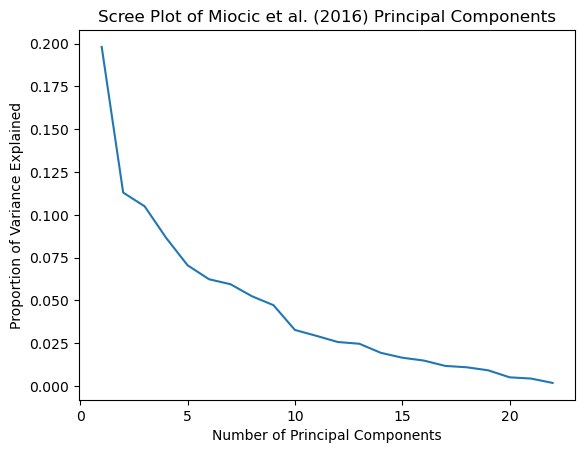

In [65]:
x= np.arange(1, 23)
y = pca.explained_variance_ratio_
plt.plot(x, y)
plt.xlabel('Number of Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot of Miocic et al. (2016) Principal Components')
plt.show()

# Combined Plots for Thesis

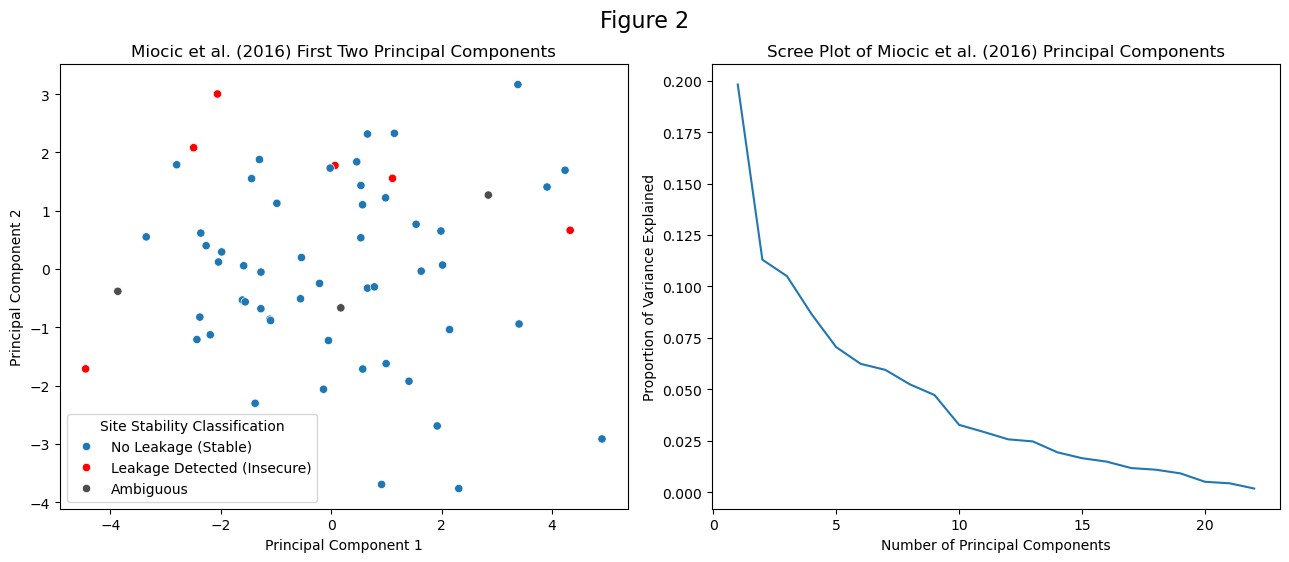

In [79]:
fig, axes = plt.subplots(1, 2, figsize=(13, 6))

# --- Left: PCA Scatter ---
sns.scatterplot(
    x=miocic_2d[:, 0],
    y=miocic_2d[:, 1],
    hue=hue,
    palette=palette,
    ax=axes[0] )
axes[0].set_title("Miocic et al. (2016) First Two Principal Components")
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal Component 2")
axes[0].legend(title='Site Stability Classification')

# --- Right: Scree Plot ---
x= np.arange(1, 23)
y = pca.explained_variance_ratio_
axes[1].plot(x, y)
axes[1].set_xlabel('Number of Principal Components')
axes[1].set_ylabel('Proportion of Variance Explained')
axes[1].set_title('Scree Plot of Miocic et al. (2016) Principal Components')

fig.subplots_adjust(wspace=0.95)
fig.suptitle("Figure 2", fontsize=16, y=0.93)
plt.tight_layout(rect=[0, 0, 1, 0.96]) 
plt.savefig("Figure_2.png", dpi=300, bbox_inches='tight')
plt.show()